<a href="https://colab.research.google.com/github/Bambillo1/elecomsCoding_academy/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import matplotlib.pyplot as plt  # Imports the matplotlib library for plotting
import pandas as pd  # Imports the pandas library for data manipulation and analysis
from re import sub  # Imports the sub function from the re (regular expression) module to perform substitutions
from decimal import Decimal  # Imports the Decimal class from the decimal module for decimal arithmetic
import copy  # Imports the copy module for creating copies of objects

# Defines a function to convert a currency string to a Decimal value
def convert_currency_to_decimal(money):
    decimal_value = Decimal(sub(r'[^\d.]', '', money))  # Removes non-digit characters except for the decimal point
    return decimal_value

# Defines a function to convert a Decimal value to a currency string
def convert_decimal_to_currency(decimal):
    currency = "${:,.2f}".format(decimal)  # Formats the Decimal value as a currency string with 2 decimal places
    return currency

# A utility method to perform ceil division
def ceil_div(a, b):
    return -(a // -b)  # Performs ceiling division by using floor division and adjusting the result

# Sets options for pandas to display all columns in output and adjusts the width for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 350)


This code imports necessary libraries like matplotlib and pandas for visualization and data manipulation. It defines functions to convert currency strings to Decimal values and vice versa. Additionally, it includes a utility method for ceiling division and sets display options for pandas to show all columns and adjust the output width.

The convert_currency_to_decimal function uses regular expressions to remove any non-digit characters (except the decimal point) from a currency string and returns the corresponding Decimal value.

The convert_decimal_to_currency function formats a Decimal value as a currency string in the format "$x,xxx.xx".

The ceil_div function calculates the ceiling division of two numbers using floor division and adjustments.

The last two lines set options for pandas to display data by configuring the maximum number of columns displayed and adjusting the display width for better visualization of tabular data.

In [33]:
class Activity:
    def __init__(self, name, duration, depends_on, planned_cost, actual_complete, actual_cost):
        # Initializes various attributes related to project scheduling and cost
        self.early_start = None
        self.early_finish = None
        self.late_start = None
        self.late_finish = None
        self.total_float = None
        self.duration = duration
        self.name = name
        self.depends_on = depends_on
        self.precedes = []  # Holds activities that this one precedes
        self.planned_cost = planned_cost
        self.actual_complete = actual_complete
        self.acwp = actual_cost  # Actual Cost of Work Performed
        self.bcwp = None  # Budgeted Cost of Work Performed
        self.bcws = None  # Budgeted Cost of Work Scheduled
        self.spi = None  # Schedule Performance Index
        self.sv = None  # Schedule Variance
        self.cpi = None  # Cost Performance Index
        self.cv = None  # Cost Variance
        self.actual_duration_till_now = None
        self.revised_duration = None

    def __str__(self):
        # Returns a formatted string representation of the Activity object
        return f"Name: {self.name}\n" \
               f"Duration: {self.duration}\n" \
               f"Early Start: {self.early_start}\n" \
               f"Early Finish: {self.early_finish}\n" \
               f"Late Start: {self.late_start}\n" \
               f"Late Finish: {self.late_finish}\n" \
               f"Total Float: {self.total_float}\n" \
               f"Depends on: {self.depends_on}\n" \
               f"Precedes: {self.precedes}\n" \
               f"Planned Cost: {self.planned_cost}\n" \
               f"Actual Complete %: {self.actual_complete}\n" \
               f"ACWP: {self.acwp}\n" \
               f"BCWP: {self.bcwp}\n" \
               f"BCWS: {self.bcws}\n" \
               f"SPI: {self.spi}\n" \
               f"SV: {self.sv}\n" \
               f"CPI: {self.cpi}\n" \
               f"CV: {self.cv}"


The Activity class is designed to represent tasks or activities in a project management scenario.
The __init__ method initializes various attributes related to scheduling, cost, and project dependencies.
The __str__ method provides a string representation of the Activity object, displaying its attributes for easy readability and debugging.
The attributes within the Activity class hold information about different aspects of project activities, such as start and finish times, dependencies, costs, schedule and cost performance metrics, and more.

In [34]:
# Ask the user to input the analysis week
analysis_week = int(input("Enter Report Date (Week): "))

# Initialize an empty dictionary to store Activity objects
activity_list1 = {}

# Use pandas to read data from a CSV file named "Assignment_4.csv"
df = pd.read_csv("Assignment_4.csv")

# Iterate over each row in the DataFrame obtained from the CSV file
for i in df.index:
    # Processing the "Dependency" column to create a list of dependencies for the Activity
    depends_on = str(df["Dependency"][i]).replace(" ", "").replace("---", "").split(",")
    if depends_on[0] == "":
        depends_on = None

    # Create Activity objects using data from the CSV file and store them in the activity_list1 dictionary
    activity_list1[df["Task"][i]] = Activity(
        df["Task"][i],  # Name of the Task
        df["Scheduled Duration (Week)"][i],  # Duration of the Task
        depends_on,  # Dependencies of the Task
        df["Planned Cost "][i],  # Planned Cost for the Task
        df["Actual Complete%"][i],  # Actual Completion Percentage for the Task
        df["Actual Cost till Now"][i]  # Actual Cost until the present time for the Task
    )


Enter Report Date (Week): 4


analysis_week = int(input("Enter Report Date (Week): ")): This line prompts the user to input an analysis week and stores it as an integer in the variable analysis_week.
activity_list1 = {}: Initializes an empty dictionary activity_list1 to store instances of Activity objects.
df = pd.read_csv("Assignment_4.csv"): Uses Pandas to read data from a CSV file named "Assignment_4.csv" into a DataFrame called df.
The subsequent for loop iterates over each row (i) in the DataFrame (df.index) to create Activity objects.
Inside the loop:
depends_on: Extracts dependencies from the "Dependency" column in the DataFrame, processes them, and

In [35]:
def compute_early_start_and_finish(activity, activity_list):
    if activity.depends_on is None:
        # Activity does not depend on any other activity; it's the first activity
        if activity.early_finish is not None:
            # Early finish already computed, return the activity
            return activity
        # Set the early start to 0 and calculate the early finish based on duration
        activity.early_start = 0
        activity.early_finish = 0 + activity.duration
        return activity
    else:
        # Activity depends on other activities
        dependencies = activity.depends_on
        max_finish = 0

        # Iterate through each dependency and compute their early start and finish
        for activity_name in dependencies:
            dependent_activity = compute_early_start_and_finish(activity_list[activity_name], activity_list)
            if activity.name not in dependent_activity.precedes:
                dependent_activity.precedes.append(activity.name)

            # Update the max_finish with the greatest early finish among dependencies
            if dependent_activity.early_finish > max_finish:
                max_finish = dependent_activity.early_finish

        # Set the early start of the current activity to the max finish among dependencies
        activity.early_start = max_finish
        # Calculate the early finish of the current activity
        activity.early_finish = activity.early_start + activity.duration
        return activity


The function takes in an activity (an instance of the Activity class) and a dictionary (activity_list) containing all activities.
It computes the early start and early finish times for the given activity based on its dependencies and the durations of those dependencies.
If the activity has no dependencies (activity.depends_on is None), it means it's the first activity in the sequence. In this case, it sets its early start to 0 and calculates the early finish by adding its duration.
If the activity has dependencies, it iterates through each dependency, recursively calling compute_early_start_and_finish to compute their early start and finish times.
It then determines the greatest early finish among the dependencies and sets the current activity's early start to that value. The early finish of the current activity is then calculated by adding its duration to the early start.
This function essentially walks through the activity dependencies, calculates the earliest start and finish times for each activity, and updates their attributes accordingly, considering the interdependencies between different activities in the project schedule.

In [36]:
def create_finish_activity(activity_list):
    # Create a placeholder finish activity
    finish_activity = Activity("finish", 0, [], 0, 0, 0)
    max_early_finish = 0

    # Iterate over the list of activities
    for activity_name in activity_list:
        activity = activity_list[activity_name]

        # If the activity doesn't have any activities that come after it, add it to the dependencies of the finish activity
        if len(activity.precedes) == 0:
            finish_activity.depends_on.append(activity_name)

        # Track the greatest early finish among all activities
        if activity.early_finish > max_early_finish:
            max_early_finish = activity.early_finish

    # Set the early and late start/finish of the finish activity to the greatest early finish found
    finish_activity.early_finish = max_early_finish
    finish_activity.late_finish = max_early_finish
    finish_activity.early_start = max_early_finish
    finish_activity.late_start = max_early_finish

    return finish_activity


create_finish_activity takes in the activity_list, a dictionary containing all activities.
It creates a placeholder finish_activity with default values for a task named "finish" and all time-related attributes initialized to 0.
The function iterates through each activity in the activity_list.
For each activity, if it doesn't have any activities that come after it (len(activity.precedes) == 0), it means it's a final activity in the sequence. Thus, it's added to the dependencies of the finish_activity.
Meanwhile, it keeps track of the maximum early finish time encountered among all activities.
Finally, it sets the early and late start/finish of the finish_activity to the maximum early finish found among all activities.
The function then returns this finish_activity.

In [37]:
def compute_late_start_and_finish(finish_activity, activity_list):
    # Get the list of activities that precede the finish activity
    precedent_activities = finish_activity.depends_on
    # If there is no preceding activity, return
    if precedent_activities is None:
        return finish_activity
    # Iterate over each preceding activity
    for activity_name in precedent_activities:
        # Get the activity object for easy manipulation
        activity = activity_list[activity_name]
        # If the activity's late finish is not set, set it to the late start of the finish activity
        if activity.late_finish is None:
            activity.late_finish = finish_activity.late_start
        # Otherwise, if activity's late finish is greater than the finish activity's late start,
        # Set the activity's late finish to the finish activity's late start.
        else:
            if activity.late_finish > finish_activity.late_start:
                activity.late_finish = finish_activity.late_start
        activity.late_start = activity.late_finish - activity.duration
        activity.total_float = activity.late_finish - activity.early_finish
        compute_late_start_and_finish(activity, activity_list)


def populate_early_start_and_finish_of_all_activities(activity_list):
    for activity in activity_list:
        compute_early_start_and_finish(activity_list[activity], activity_list)


# Compute early start and finish for all activities
populate_early_start_and_finish_of_all_activities(activity_list1)
# Create finish activity
finish_activity = create_finish_activity(activity_list1);
# Compute late start and finish for all activities given the finish activity
compute_late_start_and_finish(finish_activity, activity_list1)

# Compute percent complete by analysis week
for activity_name in activity_list1:
    # Calculate complete % by analysis week
    activity = activity_list1[activity_name]
    activity.bcwp = convert_decimal_to_currency(convert_currency_to_decimal(activity.planned_cost) * (
            Decimal(activity.actual_complete) / Decimal('100.00')))
    if convert_currency_to_decimal(activity.acwp) != 0.00:
        activity.cpi = "{:.2f}".format(
            convert_currency_to_decimal(activity.bcwp) / convert_currency_to_decimal(activity.acwp))
    else:
        activity.cpi = Decimal("0.00")
    activity.cv = convert_decimal_to_currency(
        convert_currency_to_decimal(activity.bcwp) - convert_currency_to_decimal(activity.acwp))
    percent_complete = (analysis_week - activity.early_start) / activity.duration
    if percent_complete <= 0:
        percent_complete = 0
    elif percent_complete >= 1:
        percent_complete = 1
    # percent_complete = "{:.2f}".format(percent_complete)
    activity.bcws = convert_decimal_to_currency(
        convert_currency_to_decimal(activity.planned_cost) * Decimal(percent_complete))
    if convert_currency_to_decimal(activity.bcws) != 0.00:
        activity.spi = "{:.2f}".format(
            convert_currency_to_decimal(activity.bcwp) / convert_currency_to_decimal(activity.bcws))
    else:
        activity.spi = Decimal("0.00")
    activity.sv = convert_decimal_to_currency(
        convert_currency_to_decimal(activity.bcwp) - convert_currency_to_decimal(activity.bcws))
    # Calculate actual duration till now and revised duration
    actual_duration_till_now = 0
    if activity.early_start < analysis_week:
        if activity.actual_complete < 100:
            actual_duration_till_now = analysis_week - activity.early_start
        else:
            if activity.early_finish < analysis_week:
                actual_duration_till_now = activity.duration
            else:
                actual_duration_till_now = analysis_week - activity.early_start
    else:
        actual_duration_till_now = 0
    activity.actual_duration_till_now = actual_duration_till_now
    # print(activity.actual_complete/100)
    if activity.actual_complete != 0.00:
        activity.revised_duration = int(ceil_div(activity.actual_duration_till_now, (activity.actual_complete / 100)))
    else:
        activity.revised_duration = activity.duration

This code sequence performs a series of functions and calculations related to project management. It initializes and computes various attributes of activities, including early start/finish, late start/finish, and several project metrics such as BCWP, CPI, CV, BCWS, SPI, SV, actual duration till now, and revised duration based on the completion percentage and analysis week.

In [38]:
# Initialize data structures for storing project management metrics
data = {"Task": [], "ACWP": [], "BCWP": [], "BCWS": [], "SPI": [], "SV": [], "CPI": [], "CV": []}
ev_graph_values_data = {"Task": [], "Planned Duration": [], "Actual Duration till now": [], "BCWS/Week": [],
                        "ACWP/Week": [], "BCWP/Week": []}
bcws_graph_data = {}  # Stores BCWS (Budgeted Cost of Work Scheduled) graph data
acwp_graph_data = {}  # Stores ACWP (Actual Cost of Work Performed) graph data
bcwp_graph_data = {}  # Stores BCWP (Budgeted Cost of Work Performed) graph data

# Loop through all activities to gather and calculate metrics for the project
for activity_name in activity_list1:
    activity = activity_list1[activity_name]

    # Store project metrics in the data dictionary
    data["Task"].append(activity_name)
    data["ACWP"].append(activity.acwp)
    data["BCWP"].append(activity.bcwp)
    data["BCWS"].append(activity.bcws)
    data["SPI"].append(activity.spi)
    data["SV"].append(activity.sv)
    data["CPI"].append(activity.cpi)
    data["CV"].append(activity.cv)

    # Calculate and store EV (Earned Value) graph values
    ev_graph_values_data["Task"].append(activity.name)
    ev_graph_values_data["Planned Duration"].append(activity.duration)
    ev_graph_values_data["Actual Duration till now"].append(activity.actual_duration_till_now)

    bcws_per_week = convert_currency_to_decimal(activity.planned_cost) / activity.duration
    ev_graph_values_data["BCWS/Week"].append(convert_decimal_to_currency(bcws_per_week))

    if activity.actual_duration_till_now != 0.00:
        acwp_per_week = convert_currency_to_decimal(activity.acwp) / activity.actual_duration_till_now
    else:
        acwp_per_week = 0.00
    ev_graph_values_data["ACWP/Week"].append(convert_decimal_to_currency(acwp_per_week))

    if activity.actual_duration_till_now != 0.00:
        bcwp_per_week = convert_currency_to_decimal(activity.bcwp) / activity.actual_duration_till_now
    else:
        bcwp_per_week = 0.00
    ev_graph_values_data["BCWP/Week"].append(convert_decimal_to_currency(bcwp_per_week))

    # Calculate and store BCWS, ACWP, BCWP graph data for each activity
    bcws_graph_data[activity.name] = []
    for i in range(finish_activity.early_finish):
        if i >= activity.early_start and i < activity.early_finish:
            bcws_graph_data[activity.name].append(bcws_per_week)
        else:
            bcws_graph_data[activity.name].append(Decimal(0))

    acwp_graph_data[activity.name] = []
    for i in range(analysis_week):
        if i >= activity.early_start and i < activity.early_finish:
            acwp_graph_data[activity.name].append(acwp_per_week)
        else:
            acwp_graph_data[activity.name].append(Decimal(0))

    bcwp_graph_data[activity.name] = []
    for i in range(analysis_week):
        if i >= activity.early_start and i < activity.early_finish:
            bcwp_graph_data[activity.name].append(bcwp_per_week)
        else:
            bcwp_graph_data[activity.name].append(Decimal(0))


This block initializes dictionaries (data, ev_graph_values_data, bcws_graph_data, acwp_graph_data, bcwp_graph_data) to store project management metrics and graph data related to activities.
It iterates through each activity in activity_list1.
For each activity:
Collects project metrics such as ACWP, BCWP, BCWS, SPI, SV, CPI, and CV into the data dictionary.
Calculates and collects EV graph values (Planned Duration, Actual Duration till now, BCWS/Week, ACWP/Week, BCWP/Week) into the ev_graph_values_data dictionary.
Calculates and stores BCWS, ACWP, BCWP graph data into respective dictionaries (bcws_graph_data, acwp_graph_data, bcwp_graph_data) for each activity based on their time frame (early_start and early_finish). These graphs show values over time for each activity.

In [39]:
def populateCummulatives(graph_data):
    cummulative = []  # Initialize an empty list to store cumulative values
    first_activity_name = ""  # Initialize a variable to store the first activity name

    # Loop through activity names in graph_data to find the first activity
    for activity_name in graph_data:
        first_activity_name = activity_name  # Set the first activity name
        break  # Exit the loop after the first activity name is obtained

    sum = 0  # Initialize a variable to store the cumulative sum

    # Loop through the range of data for the first activity
    for i in range(len(graph_data[first_activity_name])):
        # Loop through each activity in graph_data to calculate the cumulative sum for each index
        for activity_name in graph_data:
            sum = sum + graph_data[activity_name][i]  # Add the value of each activity at index i to the sum
        cummulative.append(sum)  # Append the cumulative sum to the cummulative list

    return cummulative  # Return the list of cumulative sums for each index


The function populateCummulatives takes in a dictionary graph_data, which contains numerical data related to different activities.
It creates an empty list cummulative to store the calculated cumulative values.
It initializes first_activity_name to store the name of the first activity encountered in graph_data.
The function calculates the cumulative sum for each index across all activities in graph_data and stores these cumulative sums in the cummulative list.
It returns the list containing cumulative sums corresponding to each index across activities.

In [40]:
# Initialize variables to store total values for different metrics
total_acwp = 0
total_bcwp = 0
total_bcws = 0

# Calculate total ACWP (Actual Cost of Work Performed)
for acwp in data["ACWP"]:
    total_acwp = total_acwp + convert_currency_to_decimal(acwp)

# Calculate total BCWP (Budgeted Cost of Work Performed)
for bcwp in data["BCWP"]:
    total_bcwp = total_bcwp + convert_currency_to_decimal(bcwp)

# Calculate total BCWS (Budgeted Cost of Work Scheduled)
for bcws in data["BCWS"]:
    total_bcws = total_bcws + convert_currency_to_decimal(bcws)

# Calculate total SPI (Schedule Performance Index)
if total_bcws != 0.00:
    total_spi = total_bcwp / total_bcws
else:
    total_spi = 0.00

# Calculate total SV (Schedule Variance)
total_sv = total_bcwp - total_bcws

# Calculate total CPI (Cost Performance Index)
if total_acwp != 0.00:
    total_cpi = total_bcwp / total_acwp
else:
    total_cpi = 0.00

# Calculate total CV (Cost Variance)
total_cv = total_bcwp - total_acwp

# Append aggregated totals to the data dictionary
data["Task"].append("Total")
data["ACWP"].append(convert_decimal_to_currency(total_acwp))
data["BCWP"].append(convert_decimal_to_currency(total_bcwp))
data["BCWS"].append(convert_decimal_to_currency(total_bcws))
data["SPI"].append("{:.2f}".format(total_spi))
data["SV"].append(convert_decimal_to_currency(total_sv))
data["CPI"].append("{:.2f}".format(total_cpi))
data["CV"].append(convert_decimal_to_currency(total_cv))

# Create a DataFrame with the updated data
new_df = pd.DataFrame(data)

# Display the DataFrame
print(f"EV Analysis at week {analysis_week}")
print(new_df)
print("")


EV Analysis at week 4
    Task       ACWP       BCWP       BCWS   SPI        SV   CPI          CV
0      A      $600     $700.00    $700.00  1.00     $0.00  1.17     $100.00
1      B      $600     $240.00    $720.00  0.33  $-480.00  0.40    $-360.00
2      C        $0       $0.00      $0.00  0.00     $0.00  0.00       $0.00
3      D        $0       $0.00      $0.00  0.00     $0.00  0.00       $0.00
4      E    $1,000     $400.00    $800.00  0.50  $-400.00  0.40    $-600.00
5      F    $2,200   $1,400.07    $700.00  2.00   $700.07  0.64    $-799.93
6      G    $1,800   $2,100.00  $1,260.00  1.67   $840.00  1.17     $300.00
7  Total  $6,200.00  $4,840.07  $4,180.00  1.16   $660.07  0.78  $-1,359.93



Total Calculation:

Three loops calculate the total values for ACWP, BCWP, and BCWS by summing up their respective values across all activities.
SPI (Schedule Performance Index), SV (Schedule Variance), CPI (Cost Performance Index), and CV (Cost Variance) are calculated using formulas based on the aggregated values.
Appending Totals to Data:

The aggregated totals for each metric are appended to the data dictionary under the "Total" task.
DataFrame Creation:

A new DataFrame (new_df) is created from the updated data dictionary.
Printing Results:

The code prints a header indicating the analysis week and then prints the newly created DataFrame to display the project management metrics for all activities, including the aggregated totals under the "Total" task.

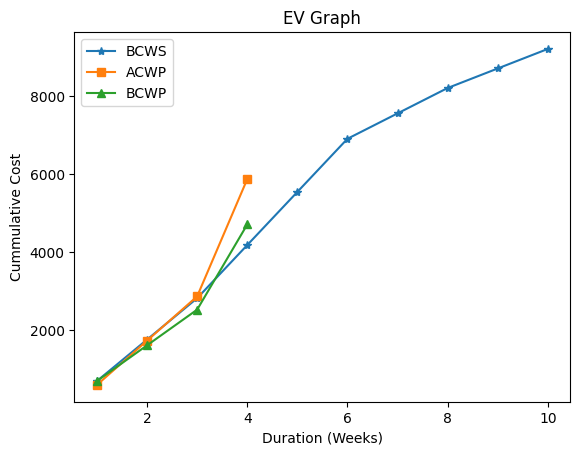

EV Graph Values at week 4
  Task  Planned Duration  Actual Duration till now BCWS/Week  ACWP/Week  BCWP/Week
0    A                 1                         1   $700.00    $600.00    $700.00
1    B                 5                         3   $240.00    $200.00     $80.00
2    C                 2                         0   $650.00      $0.00      $0.00
3    D                 2                         0   $500.00      $0.00      $0.00
4    E                 2                         3   $400.00    $333.33    $133.33
5    F                 3                         1   $700.00  $2,200.00  $1,400.07
6    G                 5                         3   $420.00    $600.00    $700.00



In [41]:
# Calculate cumulative values for BCWS, ACWP, and BCWP using populateCummulatives function
bcws_cummulatives = populateCummulatives(bcws_graph_data)
acwp_cummulatives = populateCummulatives(acwp_graph_data)
bcwp_cummulatives = populateCummulatives(bcwp_graph_data)

# Generate lists representing weeks (time) for plotting
weeks = []
for i in range(1, finish_activity.early_finish + 1):
    weeks.append(i)

weeks_for_acwp = []
for i in range(1, analysis_week + 1):
    weeks_for_acwp.append(i)

# Plot the EV graph using Matplotlib
plt.plot(weeks, bcws_cummulatives, label="BCWS", marker="*")
plt.plot(weeks_for_acwp, acwp_cummulatives, label="ACWP", marker="s")
plt.plot(weeks_for_acwp, bcwp_cummulatives, label="BCWP", marker="^")
plt.title("EV Graph")
plt.xlabel("Duration (Weeks)")
plt.ylabel("Cummulative Cost")
plt.legend()
plt.show()

# Create a DataFrame to display EV graph values
ev_graph_df = pd.DataFrame(ev_graph_values_data)
print(f"EV Graph Values at week {analysis_week}")
print(ev_graph_df)
print("")


Calculation of Cumulative Values:

populateCummulatives function is used to calculate cumulative values for BCWS, ACWP, and BCWP using data from bcws_graph_data, acwp_graph_data, and bcwp_graph_data.
Weeks Generation:

Lists (weeks, weeks_for_acwp) are generated to represent weeks or time intervals for plotting the EV graph. These lists are used as x-axis values.
Plotting the EV Graph:

Matplotlib (plt) is used to plot the EV graph. It generates lines representing cumulative costs over time for BCWS, ACWP, and BCWP.
The graph is labeled and customized with a title, axis labels, and a legend.
Displaying EV Graph Values:

A DataFrame (ev_graph_df) is created using the data in ev_graph_values_data.
The code prints the DataFrame, displaying the EV graph values calculated at the specified analysis week.

In [42]:
# Initialize total planned cost variable
total_planned_cost = 0

# Calculate total planned cost by summing up planned costs of all activities
for activity_name in activity_list1:
    activity = activity_list1[activity_name]
    total_planned_cost = total_planned_cost + convert_currency_to_decimal(activity.planned_cost)

# Calculate estimate at completion (EAC) using Cost Performance Index (CPI)
estimate_at_completion = total_planned_cost / Decimal("{:.2f}".format(total_cpi))

# Calculate Project Duration and Estimated Project Duration using Schedule Performance Index (SPI)
project_duration = finish_activity.early_finish
estimated_project_duration = "{:.2f}".format(project_duration / total_spi)

# Print the calculated estimates
print(f"Estimate at completion: {convert_decimal_to_currency(estimate_at_completion)}")
print(f'Estimated Project Duration: {estimated_project_duration}')

# Create a deep copy of the activity list
copied_activity_list = copy.deepcopy(activity_list1)

# Set Duration of copied activities to revised duration and reset parameters for re-computation
for activity_name in copied_activity_list:
    activity = copied_activity_list[activity_name]
    activity.duration = activity.revised_duration
    activity.early_start = None
    activity.early_finish = None
    activity.late_start = None
    activity.late_finish = None
    activity.total_float = None
    activity.precedes = []

# Compute early start and finish for all activities in the copied list
populate_early_start_and_finish_of_all_activities(copied_activity_list)

# Create finish activity for the copied list
copied_finish_activity = create_finish_activity(copied_activity_list)

# Compute late start and finish for all activities in the copied list
compute_late_start_and_finish(copied_finish_activity, copied_activity_list)

# Initialize a dictionary to store revised scheduling data
updated_schedule_data = {"Task": [], "Duration": [], "ESo": [], "EFo": [], "LSo": [], "LFo": [],
                         "Revised Duration": [], "ESr": [], "EFr": [], "LSr": [], "LFr": []}


Estimate at completion: $11,794.87
Estimated Project Duration: 8.64


Total Planned Cost Calculation:

Calculates the total planned cost by summing up the planned costs of all activities in activity_list1.
Estimate at Completion (EAC):

Uses the Cost Performance Index (CPI) to estimate the total cost required for project completion (estimate_at_completion).
Project Duration and Estimated Project Duration:

Calculates the project duration and the estimated project duration using the Schedule Performance Index (SPI).
Manipulation of Copied Activity List:

Creates a deep copy of the activity list and modifies it by setting activity durations to revised durations and resetting parameters for re-computation.
Computation of Early and Late Start/Finish:

Calculates the early start and finish for activities in the copied list, creates a finish activity, and computes the late start and finish times for all activities.
Initialization of Revised Scheduling Data:

Initializes an empty dictionary updated_schedule_data to store revised scheduling information.

In [43]:
# Loop through each activity in activity_list1 and copied_activity_list
for activity_name in activity_list1:
    # Get the original activity and its corresponding revised activity from the copied list
    activity = activity_list1[activity_name]
    revised_activity = copied_activity_list[activity_name]

    # Append scheduling data for both original and revised activities to updated_schedule_data dictionary
    updated_schedule_data["Task"].append(activity.name)
    updated_schedule_data["Duration"].append(activity.duration)
    updated_schedule_data["ESo"].append(activity.early_start)
    updated_schedule_data["EFo"].append(activity.early_finish)
    updated_schedule_data["LSo"].append(activity.late_start)
    updated_schedule_data["LFo"].append(activity.late_finish)
    updated_schedule_data["Revised Duration"].append(revised_activity.duration)
    updated_schedule_data["ESr"].append(revised_activity.early_start)
    updated_schedule_data["EFr"].append(revised_activity.early_finish)
    updated_schedule_data["LSr"].append(revised_activity.late_start)
    updated_schedule_data["LFr"].append(revised_activity.late_finish)

# Create a DataFrame from updated_schedule_data
revised_schedule_df = pd.DataFrame(updated_schedule_data)

# Print the revised schedule DataFrame
print("")
print(f"Revised Schedule at week {analysis_week}")
print(revised_schedule_df)



Revised Schedule at week 4
  Task  Duration  ESo  EFo  LSo  LFo  Revised Duration  ESr  EFr  LSr  LFr
0    A         1    0    1    0    1                 1    0    1    0    1
1    B         5    1    6    1    6                15    1   16    1   16
2    C         2    6    8    6    8                 2   16   18   16   18
3    D         2    8   10    8   10                 2   18   20   18   20
4    E         2    1    3    3    5                 6    1    7   10   16
5    F         3    3    6    5    8                 2    7    9   16   18
6    G         5    1    6    3    8                 3    1    4   15   18


Iteration through Activities:

The loop iterates through each activity in activity_list1.
For each activity, it retrieves scheduling-related data such as name, duration, early start/finish, and late start/finish from both the original activity_list1 and the revised copied_activity_list.
Data Collection:

Data from the original and revised activities are appended into the updated_schedule_data dictionary under specific keys representing different scheduling attributes.
DataFrame Creation:

Once the loop completes, a DataFrame revised_schedule_df is created using the collected scheduling data stored in the updated_schedule_data dictionary.
Displaying Revised Schedule:

Finally, the code prints the DataFrame displaying the revised scheduling information for each activity at the specified analysis week.
This code segment essentially collects scheduling details for each activity, both from the original and revised versions, and organizes this information into a DataFrame for easy visualization and comparison of the revised schedule.